In [1]:
import numpy as np
import random
import scipy.interpolate as interp
import matplotlib.pyplot as plt
H_in_kJmol = 2625.499639
R = 8.314 # J/(K*mol)
T = 300   # K
RT = R*T/1000.0 # kJ / mol
RT_au = RT/2625.5
kB          = 1.380648e-23      # J / K
H_to_J      = 4.359744e-18      #
kB_a        = kB / H_to_J       # Hartree / K

In [2]:
WTM_2ns = np.loadtxt('WTM/bias_out_400000.dat', skiprows=1)
WTM_3p5ns = np.loadtxt('WTM/bias_out_660000.dat', skiprows=1)
WTM_5ns = np.loadtxt('WTM/bias_out.dat', skiprows=1)
lenx = len(np.unique(WTM_2ns[:,1]))
leny = len(np.unique(WTM_2ns[:,0]))
x = WTM_2ns[:,1].reshape(leny, lenx)
y = WTM_2ns[:,0].reshape(leny, lenx)
WTM_2ns = WTM_2ns[:,6].reshape(leny, lenx)*H_in_kJmol
WTM_3p5ns = WTM_3p5ns[:,6].reshape(leny, lenx)*H_in_kJmol
WTM_5ns = WTM_5ns[:,6].reshape(leny, lenx)*H_in_kJmol
WTM_2ns -= WTM_2ns.min()
WTM_3p5ns -= WTM_3p5ns.min()
WTM_5ns -= WTM_5ns.min()

In [3]:
Meta_2ns   = np.loadtxt('metaD/bias_out_400000.dat', skiprows=1)
Meta_3p5ns = np.loadtxt('metaD/bias_out_600000.dat', skiprows=1)
Meta_5ns   = np.loadtxt('metaD/bias_out_800000.dat', skiprows=1)
Meta_2ns   = Meta_2ns[:,6].reshape(leny, lenx)*H_in_kJmol
Meta_3p5ns = Meta_3p5ns[:,6].reshape(leny, lenx)*H_in_kJmol
Meta_5ns   = Meta_5ns[:,6].reshape(leny, lenx)*H_in_kJmol
Meta_2ns  -= Meta_2ns.min()
Meta_3p5ns -= Meta_3p5ns.min()
Meta_5ns  -= Meta_5ns.min()

In [21]:
minx = x.min()
maxx = x.max()
miny = y.min()
maxy = y.max()
dx = x[0,1]-x[0,0]
dy = y[1,0]-y[0,0]
x_bins = len(np.unique(x))
y_bins = len(np.unique(y))
        
dxi = dx / 2
dyi = dy / 2

xi = np.arange(minx-dxi, maxx+dxi, dxi)
yi = np.arange(miny-dyi, maxy+dyi, dyi)
lenx = len(xi)
leny = len(yi)
xx, yy = np.meshgrid(xi,yi)

Ix = interp.RectBivariateSpline(y, x, 
Iy = interp.RectBivariateSpline(np.unique(data[:,0]), np.unique(data[:,1]), data[:,4].reshape(self.y_bins, self.x_bins)*H_in_kJmol)

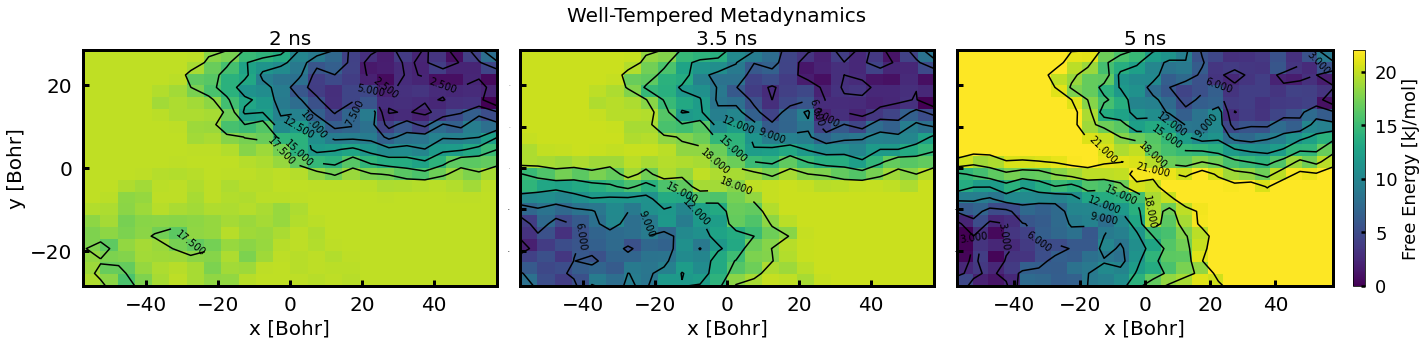

In [4]:
# Plotting
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["axes.titlesize"] = 20
fig, axs = plt.subplots(ncols=3)
#
CS = axs[0].contour(x, y, WTM_2ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im0 = axs[0].imshow(WTM_2ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[0].tick_params(axis='y',length=6,width=3,labelsize=20, pad=10, direction='in')
axs[0].set(title='2 ns')
axs[0].set_ylabel('y [Bohr]', fontsize=20)
#
CS = axs[1].contour(x, y, WTM_3p5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im1 = axs[1].imshow(WTM_3p5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[1].tick_params(axis='y',length=6,width=3,labelsize=0, pad=10, direction='in')
axs[1].set(title='3.5 ns')
#
CS = axs[2].contour(x, y, WTM_5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im2 = axs[2].imshow(WTM_5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[2].set(title='5 ns')
axs[2].tick_params(axis='y',length=6,width=3,labelsize=0, pad=0, direction='in')
#
cb2 = plt.colorbar(im2, ax=axs[2], fraction=0.044)
cb2.ax.set_ylabel('Free Energy [kJ/mol]', fontsize=18)
cb2.ax.tick_params(length=4,width=2.5,labelsize=18, pad=10, direction='in')
#
for ax in axs:
    ax.set_xlabel(r'x [Bohr]', fontsize=20)
    ax.spines['bottom'].set_linewidth('3')
    ax.spines['top'].set_linewidth('3')
    ax.spines['left'].set_linewidth('3')
    ax.spines['right'].set_linewidth('3')
    ax.tick_params(axis='x',length=6,width=3,labelsize=20, pad=10, direction='in')
#
fig.suptitle('Well-Tempered Metadynamics', fontsize=20, y=0.95)
plt.tight_layout()
plt.savefig("WTM.png", dpi=400)
plt.show()
plt.close()

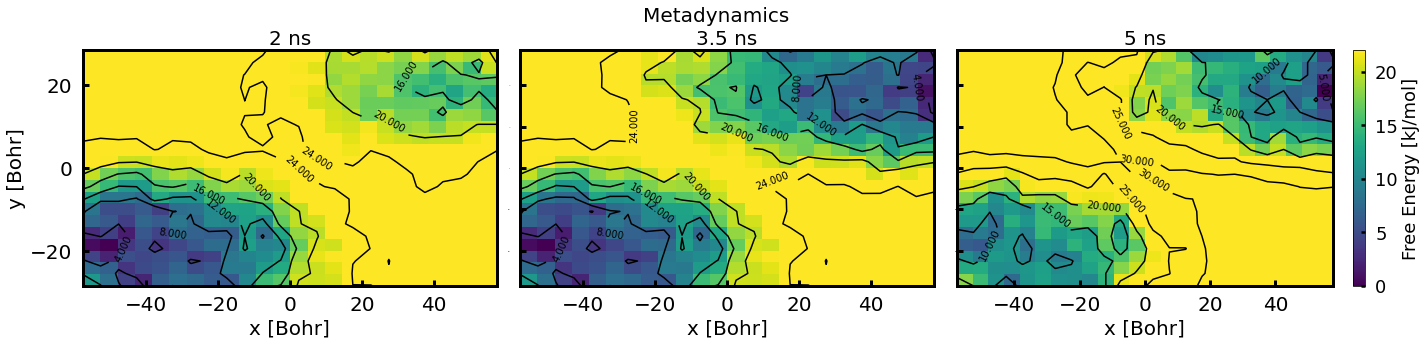

In [5]:
# Plotting
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["axes.titlesize"] = 20
fig, axs = plt.subplots(ncols=3)
#
CS = axs[0].contour(x, y, Meta_2ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im0 = axs[0].imshow(Meta_2ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[0].tick_params(axis='y',length=6,width=3,labelsize=20, pad=10, direction='in')
axs[0].set(title='2 ns')
axs[0].set_ylabel('y [Bohr]', fontsize=20)
#
CS = axs[1].contour(x, y, Meta_3p5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im1 = axs[1].imshow(Meta_3p5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[1].tick_params(axis='y',length=6,width=3,labelsize=0, pad=10, direction='in')
axs[1].set(title='3.5 ns')
#
CS = axs[2].contour(x, y, Meta_5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im2 = axs[2].imshow(Meta_5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[2].set(title='5 ns')
axs[2].tick_params(axis='y',length=6,width=3,labelsize=0, pad=0, direction='in')
#
cb2 = plt.colorbar(im2, ax=axs[2], fraction=0.044)
cb2.ax.set_ylabel('Free Energy [kJ/mol]', fontsize=18)
cb2.ax.tick_params(length=4,width=2.5,labelsize=18, pad=10, direction='in')
#
for ax in axs:
    ax.set_xlabel(r'x [Bohr]', fontsize=20)
    ax.spines['bottom'].set_linewidth('3')
    ax.spines['top'].set_linewidth('3')
    ax.spines['left'].set_linewidth('3')
    ax.spines['right'].set_linewidth('3')
    ax.tick_params(axis='x',length=6,width=3,labelsize=20, pad=10, direction='in')
#
fig.suptitle('Metadynamics', fontsize=20, y=0.95)
plt.tight_layout()
plt.savefig("metaD.png", dpi=400)
plt.show()
plt.close()

In [6]:
ABF_2ns = np.loadtxt('ABF/ABF_2ns.dat', skiprows=1)
ABF_3p5ns = np.loadtxt('ABF/ABF_3p5ns.dat', skiprows=1)
ABF_5ns = np.loadtxt('ABF/ABF_5ns.dat', skiprows=1)
lenx = len(np.unique(ABF_2ns[:,1]))
leny = len(np.unique(ABF_2ns[:,0]))
x = ABF_2ns[:,1].reshape(leny, lenx)
y = ABF_2ns[:,0].reshape(leny, lenx)
ABF_2ns = ABF_2ns[:,5].reshape(leny, lenx)
ABF_3p5ns = ABF_3p5ns[:,5].reshape(leny, lenx)
ABF_5ns = ABF_5ns[:,5].reshape(leny, lenx)
ABF_2ns -= ABF_2ns.min()
ABF_3p5ns -= ABF_3p5ns.min()
ABF_5ns -= ABF_5ns.min()

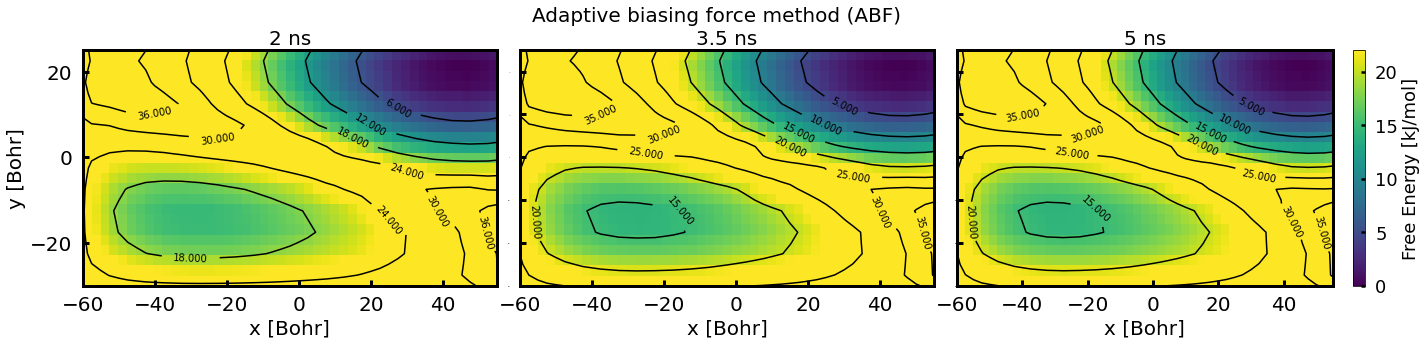

In [7]:
# Plotting
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["axes.titlesize"] = 20
fig, axs = plt.subplots(ncols=3)
#
CS = axs[0].contour(x, y, ABF_2ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im0 = axs[0].imshow(ABF_2ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[0].tick_params(axis='y',length=6,width=3,labelsize=20, pad=10, direction='in')
axs[0].set(title='2 ns')
axs[0].set_ylabel('y [Bohr]', fontsize=20)
#
CS = axs[1].contour(x, y, ABF_3p5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im1 = axs[1].imshow(ABF_3p5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[1].tick_params(axis='y',length=6,width=3,labelsize=0, pad=10, direction='in')
axs[1].set(title='3.5 ns')
#
CS = axs[2].contour(x, y, ABF_5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im2 = axs[2].imshow(ABF_5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[2].set(title='5 ns')
axs[2].tick_params(axis='y',length=6,width=3,labelsize=0, pad=0, direction='in')
#
cb2 = plt.colorbar(im2, ax=axs[2], fraction=0.044)
cb2.ax.set_ylabel('Free Energy [kJ/mol]', fontsize=18)
cb2.ax.tick_params(length=4,width=2.5,labelsize=18, pad=10, direction='in')
#
for ax in axs:
    ax.set_xlabel(r'x [Bohr]', fontsize=20)
    ax.spines['bottom'].set_linewidth('3')
    ax.spines['top'].set_linewidth('3')
    ax.spines['left'].set_linewidth('3')
    ax.spines['right'].set_linewidth('3')
    ax.tick_params(axis='x',length=6,width=3,labelsize=20, pad=10, direction='in')
#
fig.suptitle('Adaptive biasing force method (ABF)', fontsize=20, y=0.95)
plt.tight_layout()
plt.savefig("ABF.png", dpi=400)
plt.show()
plt.close()

In [8]:
eABF_2ns = np.loadtxt('eABF/eABF_2ns.dat', skiprows=1)
eABF_3p5ns = np.loadtxt('eABF/eABF_3p5ns.dat', skiprows=1)
eABF_5ns = np.loadtxt('eABF/eABF_5ns.dat', skiprows=1)
eABF_2ns = eABF_2ns[:,5].reshape(leny, lenx)
eABF_3p5ns = eABF_3p5ns[:,5].reshape(leny, lenx)
eABF_5ns = eABF_5ns[:,5].reshape(leny, lenx)
eABF_2ns -= eABF_2ns.min()
eABF_3p5ns -= eABF_3p5ns.min()
eABF_5ns -= eABF_5ns.min()

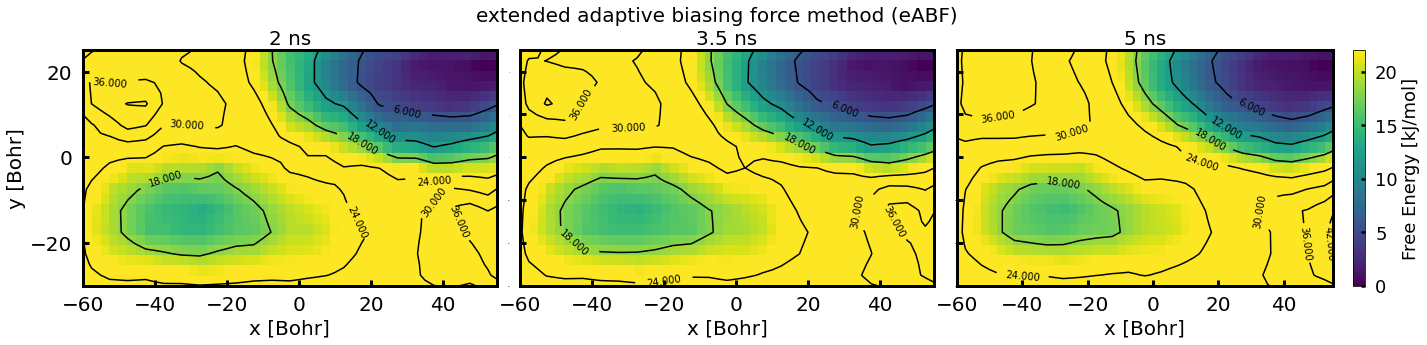

In [9]:
# Plotting
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["axes.titlesize"] = 20
fig, axs = plt.subplots(ncols=3)
#
CS = axs[0].contour(x, y, eABF_2ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im0 = axs[0].imshow(eABF_2ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[0].tick_params(axis='y',length=6,width=3,labelsize=20, pad=10, direction='in')
axs[0].set(title='2 ns')
axs[0].set_ylabel('y [Bohr]', fontsize=20)
#
CS = axs[1].contour(x, y, eABF_3p5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im1 = axs[1].imshow(eABF_3p5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[1].tick_params(axis='y',length=6,width=3,labelsize=0, pad=10, direction='in')
axs[1].set(title='3.5 ns')
#
CS = axs[2].contour(x, y, eABF_5ns, colors='black', zorder=3)
plt.clabel(CS, CS.levels, inline='true', fontsize=10, fmt="%5.3f")
im2 = axs[2].imshow(eABF_5ns, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], zorder=1, interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=22)
axs[2].set(title='5 ns')
axs[2].tick_params(axis='y',length=6,width=3,labelsize=0, pad=0, direction='in')
#
cb2 = plt.colorbar(im2, ax=axs[2], fraction=0.044)
cb2.ax.set_ylabel('Free Energy [kJ/mol]', fontsize=18)
cb2.ax.tick_params(length=4,width=2.5,labelsize=18, pad=10, direction='in')
#
for ax in axs:
    ax.set_xlabel(r'x [Bohr]', fontsize=20)
    ax.spines['bottom'].set_linewidth('3')
    ax.spines['top'].set_linewidth('3')
    ax.spines['left'].set_linewidth('3')
    ax.spines['right'].set_linewidth('3')
    ax.tick_params(axis='x',length=6,width=3,labelsize=20, pad=10, direction='in')
#
fig.suptitle('extended adaptive biasing force method (eABF)', fontsize=20, y=0.95)
plt.tight_layout()
plt.savefig("eABF.png", dpi=400)
plt.show()
plt.close()